In [29]:
# 匯入套件
from gensim.models import Word2Vec
import jieba

In [30]:
# 讀取文本
documents = []
with open("./cases/bert_finetune/reviews.txt", "r", encoding="utf-8") as file:
    for line in file:
        document = line.split("\t")[0]
        documents.append(document.replace('"', ''))

# 使用 jieba 進行斷詞 (如果是專業文本，最好自訂字典)
docs = [jieba.lcut(document) for document in documents]

# 設定參數
'''
sg = 1 -> skip-gram
sg = 0 -> cbow
'''
sg = 0 

# 向前看幾個字或向後看幾個字
window_size = 5

# 向量維度
vector_size = 100

# 訓練幾回
epochs = 5

# 最少多少個字才會被使用 (太低會帶入大量雜訊，可以嘗試 3 或 5)
min_count = 3

# 種子，用來重現訓練結果
seed = 42

# 使用幾個 CPU cores 進行訓練 (seed 只有 worker = 1 有效)
workers = 1

# 建立 Word2Vec 模型
model = Word2Vec(
    docs, 
    vector_size=vector_size, 
    window=window_size, 
    sg=sg, 
    min_count=min_count,
    workers=workers,
    seed=seed,
    epochs=epochs
)

In [31]:
# 取得 "房間" 這個詞的詞向量
vector = model.wv['房間']

# 輸出 "房間" 的詞向量
print(vector)

[-0.90222156  0.22524323  0.48775563  0.49464676 -0.02792155  0.2825998
 -0.24146603  0.145733   -0.38463143  0.09988075 -1.4316957   1.0010836
 -0.9267521   0.14497079  0.76180416  0.15307164 -1.2595357  -2.184319
 -0.5043624  -0.22566968 -0.75028443  0.10315316  0.5046569   0.60375834
  1.9962078  -0.28226593 -0.83943856 -0.35000828  0.29574788 -0.9619754
  0.5233032  -0.5617193  -0.7259201  -0.77892953  1.2179464   0.022328
  1.0281315  -1.4720682   0.39784542 -0.74273044 -0.50797963  0.25809523
  0.5833123   0.01171727 -0.8082743  -0.73622173 -0.00645157 -0.26128802
  1.498915    0.48441064  0.9055539  -0.25668293  0.33345982 -0.59665626
 -0.32079017 -0.8759263   0.00730191 -0.14039451  0.09285766 -0.25904986
  0.27220967  1.4389523  -1.5759794   0.4876955   0.35974437  0.79803616
  0.09075332  0.45990324 -0.12461507  0.5511018   0.6019156  -0.44203553
 -1.0122973  -2.5482268   0.5983186   0.5933239   0.70284516  0.46688697
  1.3179451  -0.45936024 -0.8080237   0.5782176  -0.614682

In [32]:
# 儲存模型
model.save('word2vec.model')

In [33]:
# 讀取模型
loaded_model = Word2Vec.load("word2vec.model")

In [34]:
# 尋找相近的字詞
loaded_model.wv.most_similar('房間', topn=10)

[('床', 0.8320735692977905),
 ('衛生間', 0.8068493604660034),
 ('很大', 0.7637844681739807),
 ('洗手', 0.7512425780296326),
 ('房間裡', 0.7444034814834595),
 ('套房', 0.7439740896224976),
 ('寬', 0.7401012182235718),
 ('空間', 0.740009605884552),
 ('裡面', 0.7398306131362915),
 ('樓層', 0.7383050322532654)]

In [35]:
# 計算相近度
loaded_model.wv.similarity('房間', '房子')

np.float32(0.628606)

# 如何找到合適的 epoch 數量？

訓練第 1 個 epoch
Epoch 01 | alpha 0.02500->0.02451 | Loss 1328938.875
訓練第 2 個 epoch
Epoch 02 | alpha 0.02451->0.02402 | Loss 1097642.75
訓練第 3 個 epoch
Epoch 03 | alpha 0.02402->0.02353 | Loss 1014681.1875
訓練第 4 個 epoch
Epoch 04 | alpha 0.02353->0.02304 | Loss 961787.6875
訓練第 5 個 epoch
Epoch 05 | alpha 0.02304->0.02255 | Loss 924142.6875
訓練第 6 個 epoch
Epoch 06 | alpha 0.02255->0.02206 | Loss 894933.6875
訓練第 7 個 epoch
Epoch 07 | alpha 0.02206->0.02157 | Loss 871444.6875
訓練第 8 個 epoch
Epoch 08 | alpha 0.02157->0.02108 | Loss 852991.1875
訓練第 9 個 epoch
Epoch 09 | alpha 0.02108->0.02059 | Loss 834544.25
訓練第 10 個 epoch
Epoch 10 | alpha 0.02059->0.02010 | Loss 820572.0625
訓練第 11 個 epoch
Epoch 11 | alpha 0.02010->0.01961 | Loss 806023.75
訓練第 12 個 epoch
Epoch 12 | alpha 0.01961->0.01912 | Loss 793979.75
訓練第 13 個 epoch
Epoch 13 | alpha 0.01912->0.01863 | Loss 784259.5
訓練第 14 個 epoch
Epoch 14 | alpha 0.01863->0.01814 | Loss 774609.125
訓練第 15 個 epoch
Epoch 15 | alpha 0.01814->0.01765 | Loss 766545.75
訓

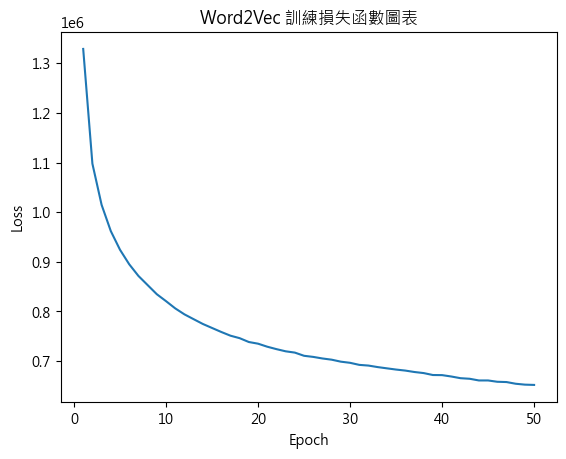

In [36]:
from gensim.models import Word2Vec
import jieba
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rc('font', family='Microsoft JhengHei')

# 讀取文本
documents = []
with open("./cases/bert_finetune/reviews.txt", "r", encoding="utf-8") as file:
    for line in file:
        document = line.split("\t")[0]
        documents.append(document.replace('"', ''))

# 使用 jieba 進行斷詞
docs = [jieba.lcut(document) for document in documents]

# 初始化模型，並啟用損失計算
model_new = Word2Vec(
    vector_size=100,
    window=5,
    sg=0,
    min_count=3,
    workers=1,
    seed=42
)

# 建立模型的詞彙表與文件標籤索引
'''
要進行訓練時，Word2Vec/Doc2Vec 需要先知道：
- 語料裡有哪些詞（words）
- 每個詞出現幾次（用來套 min_count）
- 有哪些文件標籤（tags，例如 [0], [1], [2]...）

這一步做完後，模型才知道：
- model.wv 裡有哪些詞
- model.dv 裡有哪些 doc tag（例如 5）
- model.corpus_count（語料文件數）是多少

如果你不先 build_vocab，直接 train，通常會出錯或行為不如預期。
'''
model_new.build_vocab(docs)

# 定義訓練的 epoch 數
num_epochs = 50

# 一開始的學習率
start_alpha = 0.025

# 最後的學習率
end_alpha = 0.0005

# 每跑完一個 epoch，學習率要下降多少（線性下降）
alpha_delta = (start_alpha - end_alpha) / num_epochs

# 用於儲存每個 epoch 的損失值
losses = []

# 檢視每一回合訓練後的損失值
for epoch in range(num_epochs):
    '''
    我們會用到 Stochastic Gradient Descent
    這類方法對資料順序敏感
    如果永遠同順序，可能學到偏差或收斂較差。
    打亂可讓每個 epoch 的更新路徑不同，通常更穩定。
    '''
    # 每個 epoch 開始前把文件順序打亂
    random.shuffle(docs)

    print("=" * 50)
    print(f'訓練第 {epoch+1} 個 epoch')

    '''
    a0：這個 epoch 開始時用的 alpha
    a1：這個 epoch 結束時用的 alpha

    例如：
    epoch 0：a0 ≈ 0.025，a1 ≈ 0.024...
    epoch 49：a0 ≈ 0.001...，a1 ≈ 0.0005
    '''
    # 線性更新學習率
    a0 = start_alpha - epoch * alpha_delta
    a1 = start_alpha - (epoch + 1) * alpha_delta

    # 訓練
    model_new.train(
        docs,
        total_examples=model_new.corpus_count,
        epochs=1,
        start_alpha=a0,
        end_alpha=a1,
        compute_loss=True
    )

    # 取得當前的損失值
    loss = model_new.get_latest_training_loss()

    # 得到當前的累積損失
    losses.append(loss)

    print(f"Epoch {epoch+1:02d} | alpha {a0:.5f}->{a1:.5f} | Loss {loss}")

# 繪製損失函數圖表
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Word2Vec 訓練損失函數圖表')
plt.show()